In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data.csv')

In [3]:
x = dataset[['x1','x2','x3','x4']]
y = dataset['y']

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression    
logr = LogisticRegression()

logr.fit(x_train,y_train)

y_pred_class=logr.predict(x_test)  

In [6]:
print("Intercept:", logr.intercept_)
print('Coefficient', logr.coef_)

Intercept: [-4.19546324 -3.21251524 -4.69371361]
Coefficient [[ 0.92052479 -0.71093853  2.02823359  2.98103043]
 [-0.89713157  0.55509136 -0.770296    0.14112017]
 [ 1.39458468 -0.43864047 -0.65337787 -1.78741335]]


Text(0,0.5,'Predicted Y')

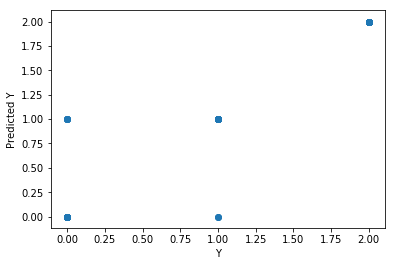

In [7]:
plt.scatter(y_test, y_pred_class)
plt.xlabel('Y')
plt.ylabel('Predicted Y')

In [8]:
# ONE TO REST CLASSIFIER

In [9]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [15]:
ovoc = OneVsRestClassifier(LinearSVC(random_state=0))
ovoc.fit(x_train, y_train)
y_predictclass1=ovoc.predict(x_test) 

Text(0,0.5,'Predicted Y')

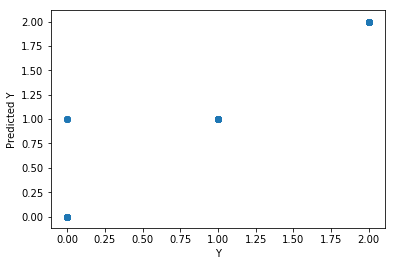

In [19]:
plt.scatter(y_test, y_predictclass1)
plt.xlabel('Y')
plt.ylabel('Predicted Y')

In [20]:
print("Intercept:", ovoc.intercept_)
print('Coefficient', ovoc.coef_)

Intercept: [[-2.27880168]
 [-1.13195862]
 [-2.10271464]]
Coefficient [[ 0.44339412 -0.35142192  0.95773837  1.5285465 ]
 [-0.30981776  0.19245683 -0.28162756  0.06094908]
 [ 0.61573866 -0.17332821 -0.31848434 -0.74711681]]


In [21]:
def sigmoid(x):
    return 1/(1+(np.exp(-x)))
def cost(X, Y, W, m):
    return  -(1./m) * np.sum(
        (np.multiply(Y, np.log(sigmoid(np.dot(W,X))))) +
        (np.multiply((1-Y),np.log(1-sigmoid(np.dot(W,X))))))


In [22]:
def logisticRegression(X1, Y1, alpha, iterations):
    X=np.c_[np.ones((len(Y1), 1)), X1]
    Y=np.array(Y1).reshape(1,len(Y1))
    X=X.T
    cost_list = []
    m = np.size(X, axis=1)
    W = np.random.random((1, X.shape[0]))
    for i in range(iterations):
        W = W - (alpha/m) * np.dot((sigmoid(np.dot(W,X)) - Y), X.T)
        cost_ = cost(X, Y, W, m)
        cost_list.append([i, cost_])
    return W, cost_list

W0 = [[-5.55508449  1.13588077 -0.89345858  2.49406858  3.81448956]]


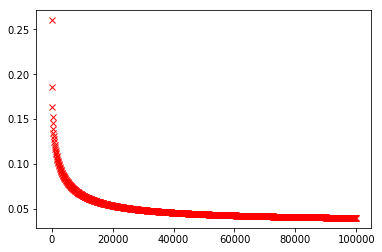

In [24]:
y0 = y_train.copy()
y0[y_train==0]=1
y0[y_train==1]=0
y0[y_train==2]=0
W0, cost_list = logisticRegression(x_train, y0, 0.01, 100000)
print('W0 =', W0)
for i in range(0, len(cost_list), 100):
    plt.plot(cost_list[i][0], cost_list[i][1], 'rx')
plt.show()


In [25]:
X=np.c_[np.ones((x_test.shape[0], 1)), x_test].T
predictions = np.dot(W0,X )
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y0_test = y_test.copy()
y0_test[y_test==0]=1
y0_test[y_test==1]=0
y0_test[y_test==2]=0
print("Accuracy class 0 = ", sum(y0_test == predictions[0]) / x_test.shape[0] )

Accuracy class 0 =  0.9715189873417721


W1 = [[-3.46606791 -0.9328332   0.5878417  -0.8673554   0.1824366 ]]


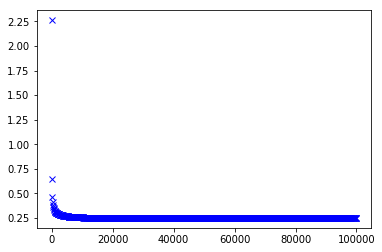

In [26]:
y1 = y_train.copy()
y1[y_train==0]=0
y1[y_train==1]=1
y1[y_train==2]=0
W1, cost_list = logisticRegression(x_train, y1, 0.01, 100000)

print('W1 =', W1)
for i in range(0, len(cost_list), 100):
    plt.plot(cost_list[i][0], cost_list[i][1], 'bx')
plt.show()


In [27]:
X=np.c_[np.ones((x_test.shape[0], 1)), x_test].T
predictions = np.dot(W1,X)
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y1_test = y_test.copy()
y1_test[y_test==0]=0
y1_test[y_test==1]=1
y1_test[y_test==2]=0
print("Accuracy class 1 = ", sum(y1_test == predictions[0]) / x_test.shape[0] )

Accuracy class 1 =  0.8639240506329114


W2 = [[-6.03279491  1.7317014  -0.52388768 -0.89499944 -2.14451917]]


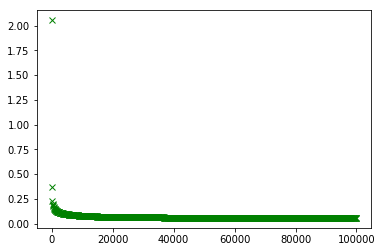

In [28]:
y2 = y_train.copy()
y2[y_train==0]=0
y2[y_train==1]=0
y2[y_train==2]=1
W2, cost_list = logisticRegression(x_train, y2, 0.01, 100000)

print('W2 =', W2)
for i in range(0, len(cost_list), 100):
    plt.plot(cost_list[i][0], cost_list[i][1], 'gx')
plt.show()

In [29]:
X=np.c_[np.ones((x_test.shape[0], 1)), x_test].T
predictions = np.dot(W2,X)
predictions[predictions < 0] = 0
predictions[predictions >0] = 1
y2_test = y_test.copy()
y2_test[y_test==0]=0
y2_test[y_test==1]=0
y2_test[y_test==2]=1
print("Accuracy for class 2:", sum(y2_test == predictions[0]) / x_test.shape[0] )

Accuracy for class 2: 0.9810126582278481


In [30]:
def distance(W, x):
    num = np.dot(W, x)
    deno = np.sqrt(np.dot(W, W.T))
    return num/deno

In [31]:
C=np.c_[np.ones((x_test.shape[0], 1)), x_test].T

prediction0 = np.dot(W0, C)
prediction1 = np.dot(W1, C)
prediction2 = np.dot(W2, C)
prediction0[prediction0 < 0] = 0
prediction0[prediction0 > 0] = 1
prediction1[prediction1 < 0] = 0
prediction1[prediction1 > 0] = 1
prediction2[prediction2 < 0] = 0
prediction2[prediction2 > 0] = 1
p=np.r_[prediction0,prediction1,prediction2]

dist=np.r_[distance(W0, C),distance(W1, C),distance(W2, C)]
prediction=np.argmax(dist,0)

print("Accuracy : ", sum(y_test == prediction) / x_test.shape[0] )

Accuracy :  0.9620253164556962
